In [1]:
import pandas as pd 

GO_raw = pd.read_table('/home/qbio1/shjoo06/p/project1/uniprot-organism__Mus+musculus_.tab')
GO_edited = GO_raw[(GO_raw['Organism'] == "Mus musculus (Mouse)")]
GO_edited = GO_edited.dropna(axis=0)
GO_edited.reset_index(drop=True,inplace=True)

GO_edited['transcript id'] = GO_edited['Ensembl transcript'].apply(lambda x: x.split(';')[0].split(' [')[0])

GO_txid = GO_edited[['Gene ontology (cellular component)','transcript id']]
GO_txid

,Gene ontology (cellular component),transcript id
0,Atg12-Atg5-Atg16 complex [GO:0034274]; autopha...,ENSMUST00000039286
1,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ENSMUST00000112751
2,autophagosome [GO:0005776]; cytoplasm [GO:0005...,ENSMUST00000130916
3,cytosol [GO:0005829]; membrane raft [GO:004512...,ENSMUST00000226593
4,cytosol [GO:0005829]; early endosome membrane ...,ENSMUST00000094782
...,...,...
33871,axon [GO:0030424]; cytosol [GO:0005829]; dendr...,ENSMUST00000182958
33872,anchored component of membrane [GO:0031225]; p...,ENSMUST00000118860
33873,cytoplasmic ribonucleoprotein granule [GO:0036...,ENSMUST00000082183
33874,nucleus [GO:0005634],ENSMUST00000088696


In [2]:
gene_tx_id = pd.read_table('/home/qbio1/shjoo06/p/project1/reference_data/annotated_geneid_transcriptid.txt',\
                           sep=' ',names=['gene id','transcript id_raw'])
df_id = pd.DataFrame(gene_tx_id)
df_id['transcript id'] = df_id['transcript id_raw'].apply(lambda x: x.split('.')[0])

df_id

,gene id,transcript id_raw,transcript id
0,ENSMUSG00000102693.2,ENSMUST00000193812.2,ENSMUST00000193812
1,ENSMUSG00000064842.3,ENSMUST00000082908.3,ENSMUST00000082908
2,ENSMUSG00000051951.6,ENSMUST00000162897.2,ENSMUST00000162897
3,ENSMUSG00000051951.6,ENSMUST00000159265.2,ENSMUST00000159265
4,ENSMUSG00000051951.6,ENSMUST00000070533.5,ENSMUST00000070533
...,...,...,...
142430,ENSMUSG00000095475.2,ENSMUST00000180208.2,ENSMUST00000180208
142431,ENSMUSG00000094855.2,ENSMUST00000178327.2,ENSMUST00000178327
142432,ENSMUSG00000095019.2,ENSMUST00000178569.2,ENSMUST00000178569
142433,ENSMUSG00000095041.8,ENSMUST00000179505.8,ENSMUST00000179505


In [3]:
df_GO_geneid = pd.merge(GO_txid, df_id)
df_GO_geneid = df_GO_geneid[['Gene ontology (cellular component)','transcript id','gene id']]
df_GO_geneid.drop_duplicates(subset=['gene id'],inplace=True)

df_GO_geneid   #GO(cc) - gene id 매치시키기 

,Gene ontology (cellular component),transcript id,gene id
0,Atg12-Atg5-Atg16 complex [GO:0034274]; autopha...,ENSMUST00000039286,ENSMUSG00000038160.8
1,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,ENSMUST00000112751,ENSMUSG00000057329.8
2,autophagosome [GO:0005776]; cytoplasm [GO:0005...,ENSMUST00000130916,ENSMUSG00000035086.14
3,cytosol [GO:0005829]; membrane raft [GO:004512...,ENSMUST00000226593,ENSMUSG00000022637.12
4,cytosol [GO:0005829]; early endosome membrane ...,ENSMUST00000094782,ENSMUSG00000028894.19
...,...,...,...
33814,mitochondrion [GO:0005739]; nucleus [GO:0005634],ENSMUST00000119943,ENSMUSG00000048279.20
33827,extracellular region [GO:0005576],ENSMUST00000033149,ENSMUSG00000030862.14
33855,nucleoplasm [GO:0005654],ENSMUST00000009411,ENSMUSG00000052763.8
33862,cytoplasm [GO:0005737]; nucleus [GO:0005634]; ...,ENSMUST00000096332,ENSMUSG00000062791.5


In [4]:
df_filtered = pd.read_csv("/home/qbio1/shjoo06/p/project1/alignment_data/df_filtered.csv")
df_filtered.rename(columns={'Unnamed: 0':'gene id'},inplace=True)

df_filtered

,gene id,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
0,ENSMUSG00000119584.1,2613335.0,229007.0,258118.0,375707.0,5926047.0,6253431.0
1,ENSMUSG00000026234.13,53126.0,32239.0,39970.0,37017.0,3995.0,10451.0
2,ENSMUSG00000032309.16,1266.0,1458.0,1292.0,1319.0,398.0,586.0
3,ENSMUSG00000028617.11,469.0,649.0,514.0,765.0,165.0,347.0
4,ENSMUSG00000022462.8,26359.0,5506.0,5507.0,7936.0,10012.0,10003.0
...,...,...,...,...,...,...,...
7214,ENSMUSG00000025470.12,31.0,203.0,115.0,185.0,117.0,149.0
7215,ENSMUSG00000068220.7,23.0,236.0,159.0,148.0,520.0,389.0
7216,ENSMUSG00000047281.4,11.0,385.0,150.0,256.0,129.0,155.0
7217,ENSMUSG00000024446.14,9.0,199.0,103.0,185.0,364.0,356.0


In [45]:
df_merged = pd.merge(df_GO_geneid,df_filtered)

nucleus = 'GO:0005634'
integral_membrane = 'GO:0016021'
cytoplasm = 'GO:0005737'

for index, row in df_merged.iterrows():
    if nucleus in df_merged.loc[index,'Gene ontology (cellular component)']\
    and integral_membrane in df_merged.loc[index,'Gene ontology (cellular component)']:
        df_merged.drop(index,axis=0,inplace=True)
    elif nucleus in df_merged.loc[index,'Gene ontology (cellular component)']\
    and cytoplasm in df_merged.loc[index,'Gene ontology (cellular component)']:
        df_merged.drop(index,axis=0,inplace=True)
    elif integral_membrane in df_merged.loc[index,'Gene ontology (cellular component)']\
    and cytoplasm in df_merged.loc[index,'Gene ontology (cellular component)']:
        df_merged.drop(index,axis=0,inplace=True)
    elif integral_membrane not in df_merged.loc[index,'Gene ontology (cellular component)']\
    and cytoplasm not in df_merged.loc[index,'Gene ontology (cellular component)']\
    and nucleus not in df_merged.loc[index,'Gene ontology (cellular component)']:
        df_merged.drop(index,axis=0,inplace=True)

df_200 = df_merged.sample(n=200)  
df_200.reset_index(inplace=True)
df_200

,index,Gene ontology (cellular component),transcript id,gene id,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
0,501,integral component of membrane [GO:0016021],ENSMUST00000218044,ENSMUSG00000019989.9,1581.0,772.0,624.0,708.0,2366.0,2015.0
1,5226,cell projection [GO:0042995]; nucleus [GO:0005...,ENSMUST00000060447,ENSMUSG00000051730.16,542.0,217.0,304.0,296.0,131.0,193.0
2,692,integral component of membrane [GO:0016021],ENSMUST00000117337,ENSMUSG00000024130.17,167.0,149.0,128.0,103.0,169.0,113.0
3,3839,chromatin [GO:0000785]; nucleus [GO:0005634]; ...,ENSMUST00000071564,ENSMUSG00000058594.16,1361.0,988.0,802.0,868.0,269.0,278.0
4,1142,integral component of membrane [GO:0016021],ENSMUST00000147819,ENSMUSG00000019437.18,192.0,219.0,264.0,283.0,390.0,385.0
...,...,...,...,...,...,...,...,...,...,...
195,2591,integral component of membrane [GO:0016021],ENSMUST00000118498,ENSMUSG00000020238.15,926.0,1289.0,759.0,1367.0,1411.0,1175.0
196,4464,MLL3/4 complex [GO:0044666]; nucleus [GO:0005634],ENSMUST00000094077,ENSMUSG00000018476.8,514.0,1506.0,595.0,925.0,205.0,185.0
197,5701,cytosol [GO:0005829]; early endosome [GO:00057...,ENSMUST00000113512,ENSMUSG00000073643.12,874.0,1471.0,1286.0,1434.0,213.0,338.0
198,600,nucleus [GO:0005634],ENSMUST00000173328,ENSMUSG00000034673.15,516.0,720.0,495.0,606.0,153.0,204.0


In [46]:
df_nucleus = pd.DataFrame(columns=['Gene ontology (cellular component)','transcript id','gene id',
                                   'CLIP-35L33G','RNAseq_siLin28a','RNAseq_siLuc','RNAseq_unt','RPFsiLin28a','RPFsiLuc'])
df_int_membrane = pd.DataFrame(columns=['Gene ontology (cellular component)','transcript id','gene id',
                                   'CLIP-35L33G','RNAseq_siLin28a','RNAseq_siLuc','RNAseq_unt','RPFsiLin28a','RPFsiLuc'])
df_cytoplasm = pd.DataFrame(columns=['Gene ontology (cellular component)','transcript id','gene id',
                                   'CLIP-35L33G','RNAseq_siLin28a','RNAseq_siLuc','RNAseq_unt','RPFsiLin28a','RPFsiLuc'])

for index, row in df_200.iterrows():
    if (nucleus in df_200.loc[index,'Gene ontology (cellular component)']):
        df_nucleus.loc[index] = row

for index, row in df_200.iterrows():
    if (integral_membrane in df_200.loc[index,'Gene ontology (cellular component)']):
        df_int_membrane.loc[index] = row
        
for index, row in df_200.iterrows():
    if (cytoplasm in df_200.loc[index,'Gene ontology (cellular component)']):
        df_cytoplasm.loc[index] = row
        
df_nucleus.reset_index(inplace=True)
df_int_membrane.reset_index(inplace=True)
df_cytoplasm.reset_index(inplace=True)

df_nucleus

,index,Gene ontology (cellular component),transcript id,gene id,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
0,1,cell projection [GO:0042995]; nucleus [GO:0005...,ENSMUST00000060447,ENSMUSG00000051730.16,542.0,217.0,304.0,296.0,131.0,193.0
1,3,chromatin [GO:0000785]; nucleus [GO:0005634]; ...,ENSMUST00000071564,ENSMUSG00000058594.16,1361.0,988.0,802.0,868.0,269.0,278.0
2,8,nucleus [GO:0005634],ENSMUST00000099118,ENSMUSG00000048930.13,203.0,1204.0,778.0,835.0,283.0,575.0
3,13,nucleus [GO:0005634],ENSMUST00000218236,ENSMUSG00000025407.8,176.0,680.0,529.0,1198.0,84.0,217.0
4,15,nucleus [GO:0005634],ENSMUST00000107353,ENSMUSG00000005621.12,95.0,551.0,235.0,296.0,155.0,168.0
...,...,...,...,...,...,...,...,...,...,...
70,194,nucleus [GO:0005634],ENSMUST00000074322,ENSMUSG00000074221.13,4808.0,4082.0,2997.0,3901.0,955.0,1185.0
71,196,MLL3/4 complex [GO:0044666]; nucleus [GO:0005634],ENSMUST00000094077,ENSMUSG00000018476.8,514.0,1506.0,595.0,925.0,205.0,185.0
72,197,cytosol [GO:0005829]; early endosome [GO:00057...,ENSMUST00000113512,ENSMUSG00000073643.12,874.0,1471.0,1286.0,1434.0,213.0,338.0
73,198,nucleus [GO:0005634],ENSMUST00000173328,ENSMUSG00000034673.15,516.0,720.0,495.0,606.0,153.0,204.0


In [47]:
df_cytoplasm

,index,Gene ontology (cellular component),transcript id,gene id,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
0,5,Bcl-2 family protein complex [GO:0097136]; BIM...,ENSMUST00000019281,ENSMUSG00000027381.17,401.0,419.0,308.0,455.0,90.0,128.0
1,7,cell leading edge [GO:0031252]; cytoplasm [GO:...,ENSMUST00000043531,ENSMUSG00000038604.10,89.0,479.0,243.0,275.0,182.0,186.0
2,18,adherens junction [GO:0005912]; cytoplasm [GO:...,ENSMUST00000028135,ENSMUSG00000026796.17,197.0,2078.0,1185.0,1299.0,278.0,642.0
3,26,catalytic step 2 spliceosome [GO:0071013]; cyt...,ENSMUST00000007266,ENSMUSG00000007050.18,436.0,811.0,588.0,812.0,673.0,825.0
4,27,Arp2/3 protein complex [GO:0005885]; cytoplasm...,ENSMUST00000031421,ENSMUSG00000029465.15,790.0,1340.0,1107.0,1029.0,1100.0,1477.0
5,33,cytoplasm [GO:0005737]; ribosome [GO:0005840],ENSMUST00000155873,ENSMUSG00000059291.16,159.0,294.0,218.0,365.0,3991.0,4098.0
6,41,cytoplasm [GO:0005737],ENSMUST00000208177,ENSMUSG00000032604.17,442.0,985.0,762.0,1442.0,825.0,1330.0
7,43,cytoplasm [GO:0005737],ENSMUST00000128200,ENSMUSG00000043241.15,1105.0,1092.0,1206.0,930.0,98.0,361.0
8,48,cytoplasm [GO:0005737]; perinuclear region of ...,ENSMUST00000089058,ENSMUSG00000014426.10,721.0,1354.0,1105.0,1045.0,128.0,219.0
9,49,cytoplasm [GO:0005737],ENSMUST00000216062,ENSMUSG00000036768.7,1252.0,1172.0,1237.0,1313.0,160.0,448.0


In [48]:
df_int_membrane

,index,Gene ontology (cellular component),transcript id,gene id,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
0,0,integral component of membrane [GO:0016021],ENSMUST00000218044,ENSMUSG00000019989.9,1581.0,772.0,624.0,708.0,2366.0,2015.0
1,2,integral component of membrane [GO:0016021],ENSMUST00000117337,ENSMUSG00000024130.17,167.0,149.0,128.0,103.0,169.0,113.0
2,4,integral component of membrane [GO:0016021],ENSMUST00000147819,ENSMUSG00000019437.18,192.0,219.0,264.0,283.0,390.0,385.0
3,6,integral component of membrane [GO:0016021],ENSMUST00000236888,ENSMUSG00000024194.17,309.0,199.0,204.0,321.0,300.0,374.0
4,9,cell surface [GO:0009986]; dendrite [GO:003042...,ENSMUST00000028689,ENSMUSG00000027253.16,506.0,354.0,192.0,246.0,297.0,239.0
...,...,...,...,...,...,...,...,...,...,...
76,186,integral component of membrane [GO:0016021],ENSMUST00000134344,ENSMUSG00000024191.16,80.0,224.0,209.0,216.0,149.0,201.0
77,188,integral component of membrane [GO:0016021]; n...,ENSMUST00000010249,ENSMUSG00000118346.2,52.0,159.0,63.0,144.0,201.0,150.0
78,190,integral component of membrane [GO:0016021],ENSMUST00000088494,ENSMUSG00000067787.11,678.0,365.0,174.0,320.0,101.0,71.0
79,192,Golgi membrane [GO:0000139]; integral componen...,ENSMUST00000090827,ENSMUSG00000038208.14,92.0,69.0,70.0,69.0,109.0,74.0


In [49]:
import math
def pseudolog2(x):
    return math.log2(x+0.01)

#x좌표
n_CLIP_enrichment = df_nucleus['CLIP-35L33G'].apply(pseudolog2).sub(df_nucleus['RNAseq_unt'].apply(pseudolog2))
#y좌표 
n_siLuc_Rdensity = df_nucleus['RPFsiLuc'].apply(pseudolog2).sub(df_nucleus['RNAseq_siLuc'].apply(pseudolog2))
n_siLin28a_Rdensity = df_nucleus['RPFsiLin28a'].apply(pseudolog2).sub(df_nucleus['RNAseq_siLin28a'].apply(pseudolog2))
n_Rdensity_change = n_siLin28a_Rdensity.sub(n_siLuc_Rdensity)

i_CLIP_enrichment = df_int_membrane['CLIP-35L33G'].apply(pseudolog2).sub(df_int_membrane['RNAseq_unt'].apply(pseudolog2))
i_siLuc_Rdensity = df_int_membrane['RPFsiLuc'].apply(pseudolog2).sub(df_int_membrane['RNAseq_siLuc'].apply(pseudolog2))
i_siLin28a_Rdensity = df_int_membrane['RPFsiLin28a'].apply(pseudolog2).sub(df_int_membrane['RNAseq_siLin28a'].apply(pseudolog2))
i_Rdensity_change = i_siLin28a_Rdensity.sub(i_siLuc_Rdensity)

c_CLIP_enrichment = df_cytoplasm['CLIP-35L33G'].apply(pseudolog2).sub(df_cytoplasm['RNAseq_unt'].apply(pseudolog2))
c_siLuc_Rdensity = df_cytoplasm['RPFsiLuc'].apply(pseudolog2).sub(df_cytoplasm['RNAseq_siLuc'].apply(pseudolog2))
c_siLin28a_Rdensity = df_cytoplasm['RPFsiLin28a'].apply(pseudolog2).sub(df_cytoplasm['RNAseq_siLin28a'].apply(pseudolog2))
c_Rdensity_change = c_siLin28a_Rdensity.sub(c_siLuc_Rdensity)

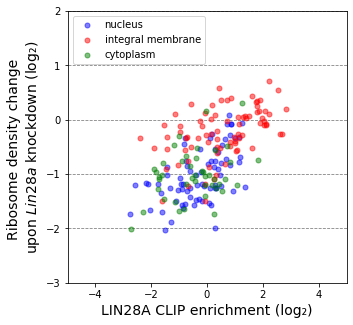

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.scatter(n_CLIP_enrichment,n_Rdensity_change, s=5**2, c='b', alpha=0.5, label='nucleus', zorder=10)
ax.scatter(i_CLIP_enrichment,i_Rdensity_change, s=5**2, c='r', alpha=0.5, label='integral membrane', zorder=10)
ax.scatter(c_CLIP_enrichment,c_Rdensity_change, s=5**2, c='g', alpha=0.5, label='cytoplasm', zorder=10)

plt.grid(True, axis='y', color='k', alpha=0.5, linestyle='--' ,zorder=1)

plt.xlim([-5,5])
plt.ylim([-3,2])

plt.xlabel('LIN28A CLIP enrichment (log\u2082)',fontsize=14)
plt.ylabel('Ribosome density change \nupon $Lin28a$ knockdown (log\u2082)',fontsize=14)

plt.legend(loc='upper left')
plt.savefig('./fig5B.png',facecolor='#FFFFFF',bbox_inches='tight')
plt.show()